**In this notebook we will cover Neurons and layers of an artificial neural modal** 

In [39]:
# let's start by importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras import Sequential

import logging

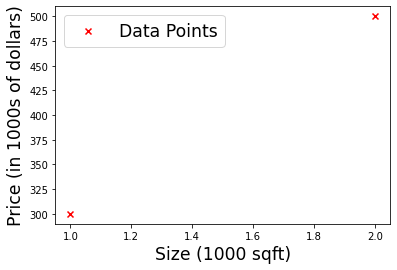

In [6]:
# Let's taking housing pricing example

X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [7]:
# Let's working with an example of neurons without activation

# Function implemented by a neuron with no activation function is same as that of a standard linear function f = w.x + b

# now let's define a single layer with a single neuron

linear_layer = tf.keras.layers.Dense(units=1, activation= 'linear')

# now let's try the model on our example of housing price data

layer_output = linear_layer(X_train)

print(f"Weight allocated is: {linear_layer.get_weights()[0]}")
print(f"Bias allocated is: {linear_layer.get_weights()[1]}")

print(f"Layer output is: {layer_output}")

# Note here that weight and bias are allocated randomly at initiation bias is always set to 0 whereas weights are set to small value

Weight allocated is: [[-0.48951006]]
Bias allocated is: [0.]
Layer output is: [[-0.48951006]
 [-0.9790201 ]]


In [12]:
# now let's set the weight and bias to train the model on specific values

set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w,set_b])

print(f"Weight allocated is: {linear_layer.get_weights()[0]}")
print(f"Bias allocated is: {linear_layer.get_weights()[1]}")

Weight allocated is: [[200.]]
Bias allocated is: [100.]


In [13]:
# now let's compute our model output from the new parameters
layer_output = linear_layer(X_train)
print(f"Tensor flow linear layer with single node on trained housing data produced: {layer_output}")

Tensor flow linear layer with single node on trained housing data produced: [[300.]
 [500.]]


In [14]:
# now let's compare the output above from the linear function we saw earlier f = w.x + b

linear_fn_output = np.dot(X_train[0], set_w[0]) + set_b

print(f"Linear function with single input feature on trained housing data produced: {linear_fn_output}")

Linear function with single input feature on trained housing data produced: [300.]


In [15]:
# now let's look at implementation of the activation function that follows sigmoid function principals

# let's define sample data for classification model training

X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

# now let's create an array of all positive and negative indexes from our output trained data

pos = Y_train == 1
neg = Y_train == 0
#print(f"Index of positive results are: {pos}")
#print(f"Index of negative results are: {neg}")
# this fetches all the values where boolean mask created previously is true from y_train
X_train[pos]

array([3., 4., 5.], dtype=float32)

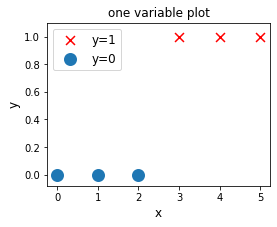

In [16]:
# now let's plot these examples

pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [17]:
# let's create a single neuron activation model using tensorflow

model = Sequential(
    [tf.keras.layers.Dense(1, input_dim=1, activation = 'sigmoid', name='L1')]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
# let's look at the parameters of the logistic layer defined previously

logistic_layer = model.get_layer("L1")
w,b = logistic_layer.get_weights()

print(f"Weight allocated is: {w}")
print(f"Bias allocated is: {b}")

Weight allocated is: [[1.5941397]]
Bias allocated is: [0.]


In [19]:
# now let's set weights to specific model weights for testing our training data

set_w = np.array([[2]])
set_b = np.array([-4.5])

# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [38]:
# now let's find the prediction using tensorflow and our previously learned sigmoid function

# Set weights for the model
model.layers[0].set_weights([set_w, set_b])

model_output = model.predict(X_train)

print(f"Model output from tensorflow single layer sigmoid activation: {model_output}")

z = np.dot(X_train,set_w) + set_b
sigmoid_fn_output = 1/(1 + np.exp(-z))

print(f"Model output from sigmoid function is : {sigmoid_fn_output}")

1/1 [==============================] - 0s 23ms/step
Model output from tensorflow single layer sigmoid activation: [[0.01098694]
 [0.07585818]
 [0.37754068]
 [0.8175745 ]
 [0.97068775]
 [0.99592984]]
Model output from sigmoid function is : [[0.01098694]
 [0.07585818]
 [0.37754067]
 [0.81757448]
 [0.97068777]
 [0.99592986]]
